In [ ]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
pip install matplotlib==3.4.2

     |████████████████████████████████| 10.3 MB 12.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Ignore the warning for using plot confusion matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("cleaned.csv")

# Drop unnecessary features
df = df.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)

# Feature variable
X = df.drop('DEATH_EVENT', axis=1)

# Target Variable
y = df['DEATH_EVENT']

In [ ]:
# 70% Training and 30% testing tests
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=42)

In [ ]:
# 80% Training and 20% testing tests
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

In [ ]:
# 90% Training and 10% testing tests
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X,
                                y,
                                test_size=0.1,
                                random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_70_scaled = scaler.fit_transform(X_train_70)
X_test_30_scaled = scaler.transform(X_test_30)

X_train_80_scaled = scaler.fit_transform(X_train_80)
X_test_20_scaled = scaler.transform(X_test_20)

X_train_90_scaled = scaler.fit_transform(X_train_90)
X_test_10_scaled = scaler.transform(X_test_10)

## **Logistic Regression**

Accuracy of logistic regression classifier using 70% training data:  0.8
F1 score for 70% training data 0.7097 



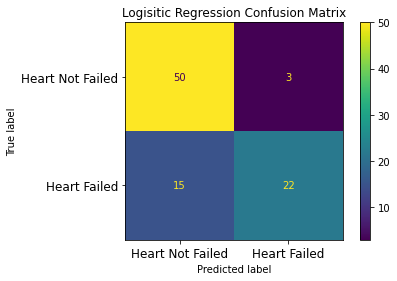

In [ ]:
# Instantiate the classifier
logreg = LogisticRegression()

# Fit the classifier
logreg.fit(X_train_70_scaled, y_train_70)

# Predict instances from the test set
logreg_y_pred = logreg.predict(X_test_30_scaled)

logreg_accuracy = round(logreg.score(X_test_30_scaled, y_test_30), 4)
logreg_f1_score = round(f1_score(y_test_30, logreg_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 70% training data", logreg_f1_score, "\n")

plot_confusion_matrix(logreg, X_test_30_scaled, y_test_30)
plt.title("Logisitic Regression Confusion Matrix")  
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [ ]:
logreg_y_test = np.array(y_test_30)
logreg_result_compare = np.concatenate((logreg_y_test.reshape(len(y_test_30), 1), logreg_y_pred.reshape(len(logreg_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(logreg_result_compare)

Outcome, Prediction
[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
logreg_prediction_error_list = []
logreg_failed_error_list = []
logreg_not_failed_error_list = []

for pair in logreg_result_compare: 

  if pair[0] != pair[1]:
    logreg_prediction_error_list.append(pair)

for error in logreg_prediction_error_list:

  if error[0] == 0:
    logreg_not_failed_error_list.append(error[0])

  else:
    logreg_failed_error_list.append(error[0])

logreg_prediction_error = len(logreg_prediction_error_list)
logreg_failed_error = len(logreg_failed_error_list)
logreg_not_failed_error = len(logreg_not_failed_error_list)

print("Wrong Predictions:", logreg_prediction_error)
print("Alive, but predicted dead:", logreg_not_failed_error)
print("Dead, but predicted alive:", logreg_failed_error)

Wrong Predictions: 18
Alive, but predicted dead: 3
Dead, but predicted alive: 15


Accuracy of logistic regression classifier using 80% training data:  0.7833
F1 score for 80% training data 0.6667 



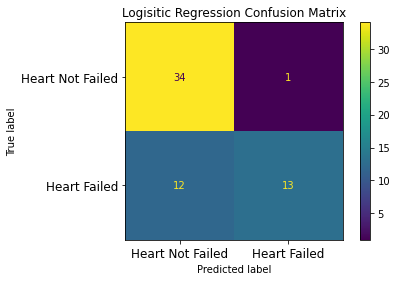

In [ ]:
# Fit the classifier
logreg.fit(X_train_80_scaled, y_train_80)

# Predict instances from the test set
y_pred = logreg.predict(X_test_20_scaled)

logreg_accuracy = round(logreg.score(X_test_20_scaled, y_test_20), 4)
logreg_f1_score = round(f1_score(y_test_20, y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 80% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 80% training data", logreg_f1_score, "\n")

plot_confusion_matrix(logreg, X_test_20_scaled, y_test_20)
plt.title("Logisitic Regression Confusion Matrix")  
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

Accuracy of logistic regression classifier using 90% training data:  0.7667
F1 score for 90% training data 0.5882 



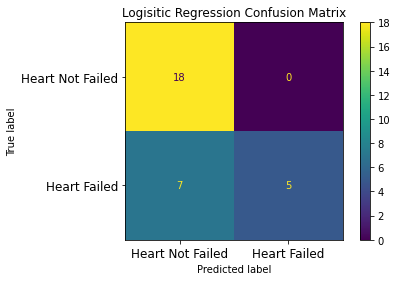

In [ ]:
# Fit the classifier
logreg.fit(X_train_90_scaled, y_train_90)

# Predict instances from the test set
y_pred = logreg.predict(X_test_10_scaled)

logreg_accuracy = round(logreg.score(X_test_10_scaled, y_test_10), 4)
logreg_f1_score = round(f1_score(y_test_10, y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 90% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 90% training data", logreg_f1_score, "\n")

plot_confusion_matrix(logreg, X_test_10_scaled, y_test_10)
plt.title("Logisitic Regression Confusion Matrix") 
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

## **Decision Tree**

Accuracy of logistic regression classifier using 70% training data:  0.7111
F1 score for 70% training data 0.6176 



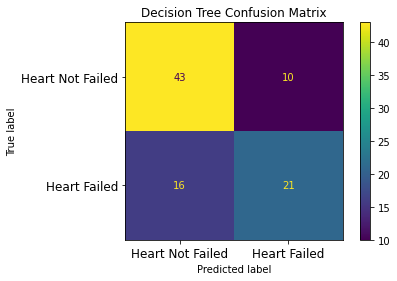

In [ ]:
dt = DecisionTreeClassifier()

# Fit the classifier
dt.fit(X_train_70_scaled, y_train_70)

dt_y_pred = dt.predict(X_test_30_scaled)

dt_accuracy = round(dt.score(X_test_30_scaled, y_test_30), 4)
dt_f1_score = round(f1_score(y_test_30, dt_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", dt_accuracy)

# Print the F1 score
print("F1 score for 70% training data", dt_f1_score, "\n")

plot_confusion_matrix(dt, X_test_30_scaled, y_test_30)  
plt.title("Decision Tree Confusion Matrix")  
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [ ]:
dt_y_test = np.array(y_test_30)
dt_result_compare = np.concatenate((dt_y_test.reshape(len(y_test_30), 1), dt_y_pred.reshape(len(dt_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(dt_result_compare)

Outcome, Prediction
[[0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
dt_prediction_error_list = []
dt_failed_error_list = []
dt_not_failed_error_list = []

for pair in dt_result_compare: 

  if pair[0] != pair[1]:
    dt_prediction_error_list.append(pair)

for error in dt_prediction_error_list:

  if error[0] == 0:
    dt_not_failed_error_list.append(error[0])

  else:
    dt_failed_error_list.append(error[0])

dt_prediction_error = len(dt_prediction_error_list)
dt_failed_error = len(dt_failed_error_list)
dt_not_failed_error = len(dt_not_failed_error_list)

print("Wrong Predictions:", dt_prediction_error)
print("Alive, but predicted dead:", dt_not_failed_error)
print("Dead, but predicted alive:", dt_failed_error)

Wrong Predictions: 26
Alive, but predicted dead: 10
Dead, but predicted alive: 16


## **Random Forest**

Accuracy of logistic regression classifier using 70% training data:  0.7778
F1 score for 70% training data 0.697 



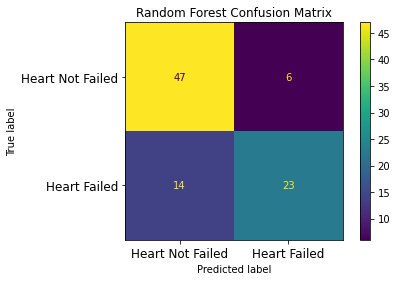

In [ ]:
rf = RandomForestClassifier()

# Fit the classifier
rf.fit(X_train_70_scaled, y_train_70)

rf_y_pred = rf.predict(X_test_30_scaled)

rf_accuracy = round(rf.score(X_test_30_scaled, y_test_30), 4)
rf_f1_score = round(f1_score(y_test_30, rf_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", rf_accuracy)

# Print the F1 score
print("F1 score for 70% training data", rf_f1_score, "\n")

plot_confusion_matrix(rf, X_test_30_scaled, y_test_30) 
plt.title("Random Forest Confusion Matrix")   
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [ ]:
rf_y_test = np.array(y_test_30)
rf_result_compare = np.concatenate((rf_y_test.reshape(len(y_test_30), 1), rf_y_pred.reshape(len(rf_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(rf_result_compare)

Outcome, Prediction
[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
rf_prediction_error_list = []
rf_failed_error_list = []
rf_not_failed_error_list = []

for pair in rf_result_compare: 

  if pair[0] != pair[1]:
    rf_prediction_error_list.append(pair)

for error in rf_prediction_error_list:

  if error[0] == 0:
    rf_not_failed_error_list.append(error[0])

  else:
    dt_failed_error_list.append(error[0])

rf_prediction_error = len(rf_prediction_error_list)
rf_failed_error = len(rf_failed_error_list)
rf_not_failed_error = len(rf_not_failed_error_list)

print("Wrong Predictions:", rf_prediction_error)
print("Alive, but predicted dead:", rf_not_failed_error)
print("Dead, but predicted alive:", rf_failed_error)

Wrong Predictions: 20
Alive, but predicted dead: 6
Dead, but predicted alive: 0


## **Summary of Accuracy and F1 Score**

In [ ]:
decimal_accuracy_list = [logreg_accuracy, dt_accuracy, rf_accuracy]
decimal_f1_score_list = [logreg_f1_score, dt_f1_score, rf_f1_score]

percentage_accuracy_list = np.array(decimal_accuracy_list) * 100
percentage_f1_score_list = [np.round(f1_score, 4) for f1_score in np.array(decimal_f1_score_list) * 100]

models = ["Logisitic Regression", "Decision Tree", "Random Forest"]

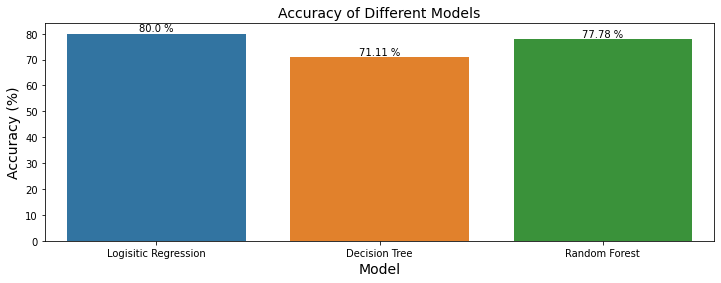

In [ ]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = percentage_accuracy_list)
plt.title("Accuracy of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Accuracy (%)", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

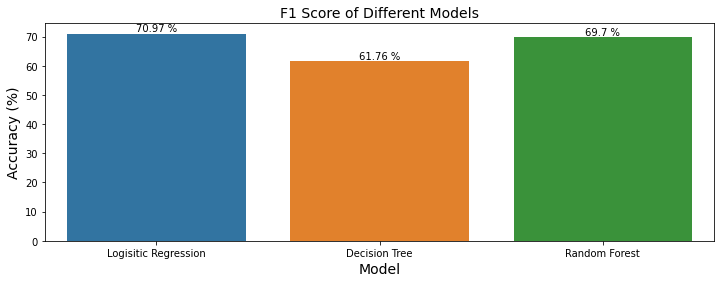

In [ ]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = percentage_f1_score_list)
plt.title("F1 Score of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Accuracy (%)", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

## **Summary of Wrong Predictions**

In [266]:
prediction_error_list = [logreg_prediction_error, dt_prediction_error, rf_prediction_error]
failed_error_list = [logreg_failed_error, dt_failed_error, rf_failed_error]
not_failed_error_list = [logreg_not_failed_error, dt_not_failed_error, rf_not_failed_error]

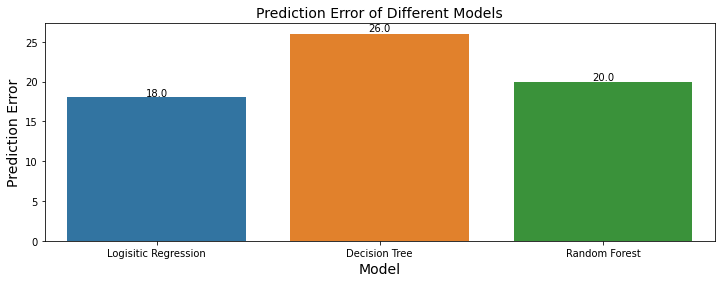

In [262]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = prediction_error_list)
plt.title("Prediction Error of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()

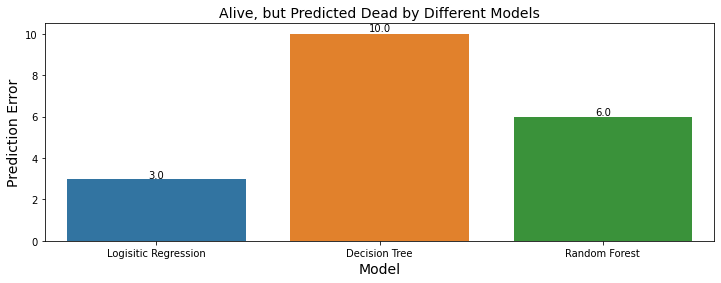

In [270]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = not_failed_error_list)
plt.title("Alive, but Predicted Dead by Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()

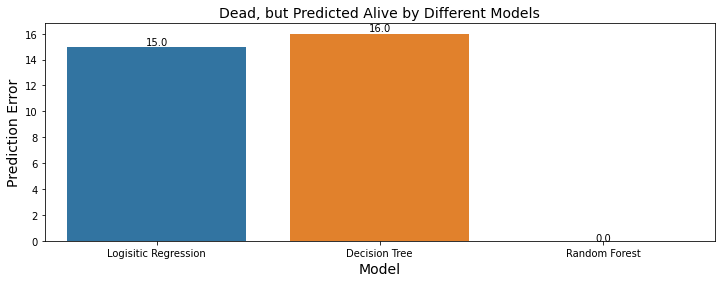

In [269]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = failed_error_list)
plt.title("Dead, but Predicted Alive by Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()